# South African Heart Disease Dataset
https://web.stanford.edu/~hastie/ElemStatLearn/data.html

A retrospective sample of males in a heart-disease high-risk region
of the Western Cape, South Africa. There are roughly two controls per
case of CHD. Many of the CHD positive men have undergone blood
pressure reduction treatment and other programs to reduce their risk
factors after their CHD event. In some cases the measurements were
made after these treatments. These data are taken from a larger
dataset, described in  Rousseauw et al, 1983, South African Medical
Journal. 

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

C:\Development\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [69]:
sns.set(font_scale=2)
sns.set_style("white")
pd.options.display.float_format = '{:,.2f}'.format

In [70]:
columns = [
    'Patient ID',
    'Systolic Blood Pressure', 
    'Tobacco (kg)', 
    'LDL', 
    'Adiposity', 
    'Fam. Hist', 
    'Type A', 
    'Obesity', 
    'Alcohol', 
    'Age',
    'Coronary Heart Disease'
]

In [112]:
heart_disease_data = pd.read_csv('https://web.stanford.edu/~hastie/ElemStatLearn/datasets/SAheart.data')
heart_disease_data.columns = columns

In [113]:
f1 = 'Age'
f2 = 'Systolic Blood Pressure'
id = 'Patient ID'
target = 'Coronary Heart Disease'

In [117]:
data = heart_disease_data.sample(100, random_state=43)[[id, f1, f2, target]]
data[target] = data[target].apply(lambda x: False if not x else True)

In [118]:
data.head()

,Patient ID,Age,Systolic Blood Pressure,Coronary Heart Disease
102,103,46,118,False
67,68,27,112,False
377,379,53,118,False
396,398,62,162,False
315,317,59,154,False


In [119]:
data_noise = data.copy()
data_noise.loc[103, 'Age'] *= 365

In [121]:
data_noise.sort_values(f1)

,Patient ID,Age,Systolic Blood Pressure,Coronary Heart Disease
441,443,16,120,False
430,432,16,118,False
437,439,16,138,False
288,290,16,123,False
44,45,17,114,False
...,...,...,...,...
370,372,64,148,True
393,395,64,180,False
228,229,64,138,True
203,204,64,128,False


In [122]:
data_noise[[f1, f2, target]].describe()

,Age,Systolic Blood Pressure
count,100.00,100.00
mean,157.54,140.65
std,"1,127.12",22.27
min,16.00,106.00
25%,32.00,124.00
50%,49.50,136.00
75%,58.25,154.00
max,"11,315.00",214.00


In [123]:
data_noise.sort_values(f2)[[id, f1, f2, target]]

,Patient ID,Age,Systolic Blood Pressure,Coronary Heart Disease
20,21,20,106,True
179,180,56,108,False
440,442,32,110,False
166,167,55,110,True
67,68,27,112,False
...,...,...,...,...
229,230,50,188,True
314,316,50,190,False
407,409,60,200,True
403,405,58,208,True


In [133]:
def make_meshgrid(x, y, h=.1):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return xx, yy

def plot_contours(ax, clf, xx, yy, **params):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

def plot_decision_boundary(the_data, model=None):
    fig, ax = plt.subplots()
    fig.set_size_inches(11.7, 8.27)
    sns.scatterplot(x=f1, y=f2, data=the_data, style=target, hue=target, ax=ax, s=150)

    if model:
        xx, yy = make_meshgrid(the_data[f1], the_data[f2])
        plot_contours(ax, model, xx, yy, cmap=plt.cm.coolwarm, alpha=0.2)

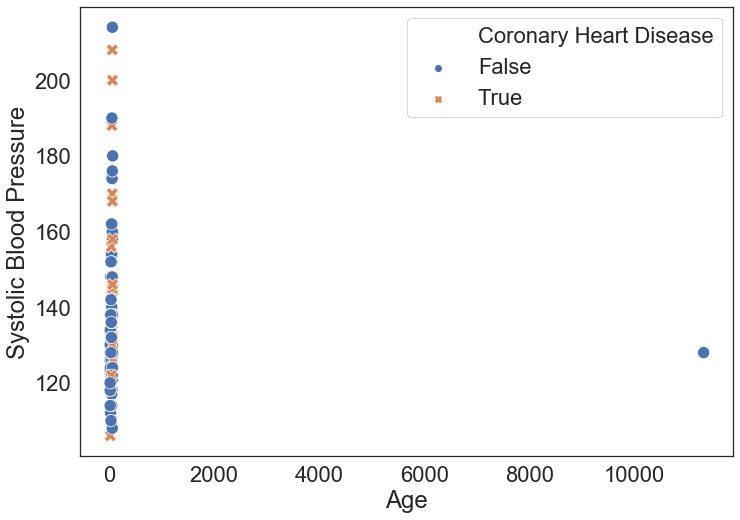

In [134]:
plot_decision_boundary(data_noise)

In [135]:
data_noise[data_noise.Age > 10000]

,Patient ID,Age,Systolic Blood Pressure,Coronary Heart Disease
103,104,11315,128,False


In [136]:
data_display = data.copy()
data_display[target] = data_display[target].astype(int)
data_display.sort_values(id)

,Patient ID,Age,Systolic Blood Pressure,Coronary Heart Disease
12,13,17,118,0
15,16,46,117,0
17,18,53,146,1
18,19,62,158,1
20,21,20,106,1
...,...,...,...,...
448,450,20,124,0
449,451,48,144,1
452,454,42,154,0
453,455,51,124,1


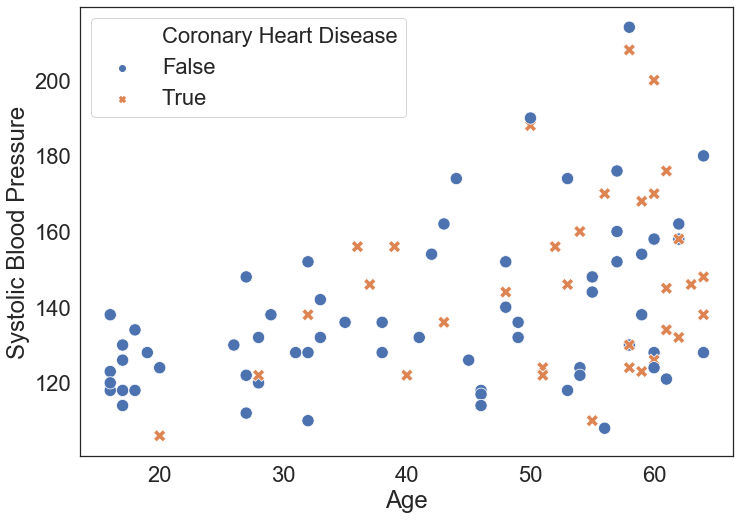

In [137]:
plot_decision_boundary(data)

In [138]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

In [172]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score

def eval(model, X, y):
    pred = model.predict(X)
    print(confusion_matrix(y, pred))
    print('Accuracy: %.2f' % accuracy_score(y, pred))
    print('Precision: %.2f' % precision_score(y, pred))
    print('Recall: %.2f' % recall_score(y, pred))

In [142]:
linear_model = LogisticRegression(solver='lbfgs')

X = data[[f1, f2]]
y = data[target]
linear_model.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

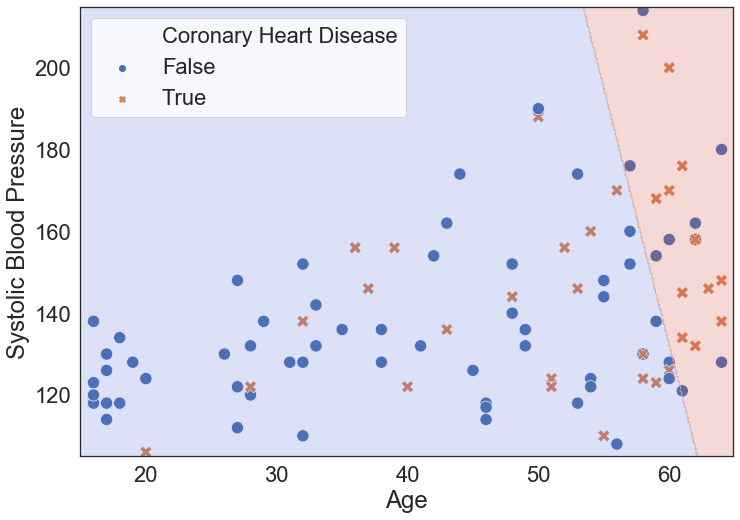

In [143]:
plot_decision_boundary(data, linear_model)

In [144]:
linear_model.coef_

array([[0.05469812, 0.00435669]])

In [145]:
linear_model.intercept_

array([-3.85732665])

In [146]:
def logit(v): return 1 / (1 + np.exp(-v))

In [147]:
logit(linear_model.coef_.dot(np.array([62, 158])) + linear_model.intercept_)

array([0.55535078])

In [148]:
weighted_linear_model = LogisticRegression(solver='lbfgs', class_weight={0: 0.5, 1: 1}, C=10.0, fit_intercept=False)

weighted_linear_model.fit(X, y)

LogisticRegression(C=10.0, class_weight={0: 0.5, 1: 1}, dual=False,
                   fit_intercept=False, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [149]:
weighted_linear_model.coef_

array([[ 0.04885209, -0.01527888]])

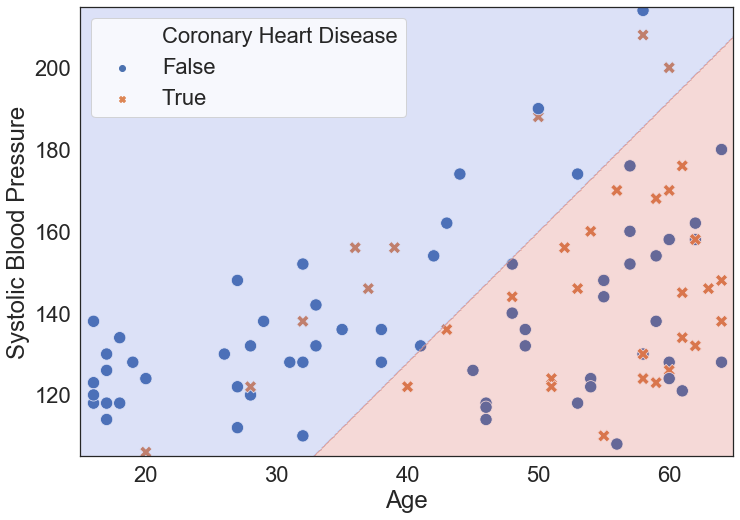

In [150]:
plot_decision_boundary(data, weighted_linear_model)

In [151]:
eval(linear_model)

[[56 10]
 [22 12]]
Accuracy: 0.68
Precision: 0.55
Recall: 0.35


In [152]:
eval(weighted_linear_model)

[[37 29]
 [ 9 25]]
Accuracy: 0.62
Precision: 0.46
Recall: 0.74


In [153]:
poly_model = Pipeline([('poly', PolynomialFeatures(degree=2, include_bias=False, interaction_only=True)), ('logreg', LogisticRegression(solver='lbfgs'))])

X = data[[f1, f2]]
y = data[target]
poly_model.fit(X, y)

Pipeline(memory=None,
         steps=[('poly',
                 PolynomialFeatures(degree=2, include_bias=False,
                                    interaction_only=True, order='C')),
                ('logreg',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=100,
                                    multi_class='warn', n_jobs=None,
                                    penalty='l2', random_state=None,
                                    solver='lbfgs', tol=0.0001, verbose=0,
                                    warm_start=False))],
         verbose=False)

In [154]:
poly_model['logreg'].coef_

array([[-0.01540401, -0.02487311,  0.00052915]])

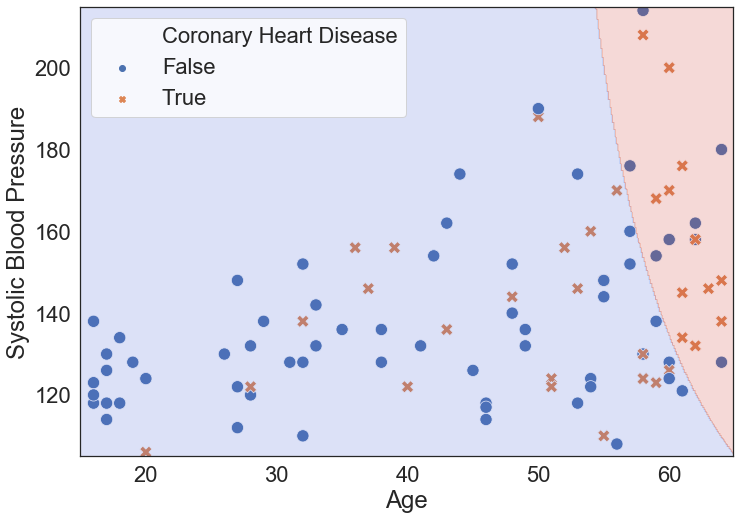

In [155]:
plot_decision_boundary(data, poly_model)

In [156]:
from sklearn.svm import SVC

In [197]:
svm_model = SVC(C=1., gamma=0.1)
svm_model.fit(X, y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

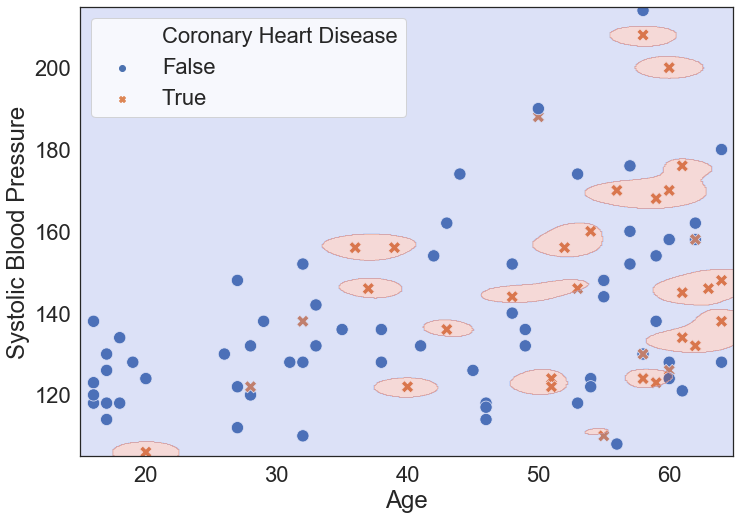

In [198]:
plot_decision_boundary(data, svm_model)

Sample a non-overlapping test set

In [199]:
test_data = heart_disease_data.drop(data.index).sample(100)

X_test = test_data[[f1, f2]]
y_test = test_data[target]

Linear model

In [200]:
eval(linear_model, X, y)

[[56 10]
 [22 12]]
Accuracy: 0.68
Precision: 0.55
Recall: 0.35


In [201]:
eval(linear_model, X_test, y_test)

[[60 11]
 [21  8]]
Accuracy: 0.68
Precision: 0.42
Recall: 0.28


Weighted model puts more emphasis on positive samples, so recall is higher for the cost of lower precision

In [202]:
eval(weighted_linear_model, X, y)

[[37 29]
 [ 9 25]]
Accuracy: 0.62
Precision: 0.46
Recall: 0.74


In [203]:
eval(weighted_linear_model, X_test, y_test)

[[40 31]
 [13 16]]
Accuracy: 0.56
Precision: 0.34
Recall: 0.55


Simple polynomial model is able to fit the data slightly better than linear model

In [204]:
eval(poly_model, X, y)

[[57  9]
 [22 12]]
Accuracy: 0.69
Precision: 0.57
Recall: 0.35


In [205]:
eval(poly_model, X_test, y_test)

[[60 11]
 [21  8]]
Accuracy: 0.68
Precision: 0.42
Recall: 0.28


Complex Non-linear model has good accuracy on training set, but overfits

In [206]:
eval(svm_model, X, y)

[[65  1]
 [ 8 26]]
Accuracy: 0.91
Precision: 0.96
Recall: 0.76


In [207]:
eval(svm_model, X_test, y_test)

[[61 10]
 [26  3]]
Accuracy: 0.64
Precision: 0.23
Recall: 0.10
